**READING THE DATASET**

In [40]:
# LOAD THE LIBRARIES
import pandas as pd
import numpy as np
import pandas_profiling as pp
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid') # darkgrid, white grid, dark, white and ticks

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [41]:
train = pd.read_csv('./ReNew_Participants_Data/train.csv')
test = pd.read_csv('./ReNew_Participants_Data/test.csv')

print("The Wind Turbine training dataset has", train.shape[0], "records, each with",train.shape[1],"attributes.")
train.head()

The Wind Turbine training dataset has 909604 records, each with 16 attributes.


,timestamp,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,wind_direction_raw,wind_speed_raw,wind_speed_turbulence,turbine_id,Target
0,2021-02-19 20:18:00,816.636759,834.917206,31.694380,1159.616602,65.954214,917.897085,31.881972,31.504713,141.457644,165.501518,280.864782,7.057000,0.544082,Turbine_108,47.582787
1,2021-04-27 04:55:00,419.107829,421.050873,12.894948,928.747996,59.571319,445.554250,32.423705,32.755770,89.186457,113.835236,299.552460,5.474937,0.469031,Turbine_18,46.070328
2,2021-01-25 06:26:00,1303.530558,1337.566142,16.648388,1201.219775,61.270498,1364.716003,11.446849,18.332985,230.622309,281.452253,84.960106,8.092457,0.622318,Turbine_105,39.989236
3,2021-10-30 03:47:00,61.494872,53.481008,28.388141,769.806122,40.674348,14.324897,34.253204,32.662889,66.211015,75.017531,87.261119,4.071032,0.760719,Turbine_15,46.056587
4,2021-03-15 00:39:00,593.514364,611.659108,31.519527,1046.916768,64.341763,599.020172,32.405586,31.466387,137.163938,160.202421,313.724818,6.357943,0.346068,Turbine_01,54.346095


In [42]:
print("The Wind Turbine test dataset has", test.shape[0], "records, each with",test.shape[1],"attributes.")
test.head()

The Wind Turbine test dataset has 303202 records, each with 14 attributes.


,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,wind_direction_raw,wind_speed_raw,wind_speed_turbulence,turbine_id
0,15.507537,19.956882,40.233264,410.538834,57.357366,84.008399,48.826597,45.363477,2.419202,1.468876,156.399396,2.438629,0.790435,Turbine_14
1,472.577255,478.373881,12.306687,965.077563,51.796728,492.531362,27.457511,24.045565,96.152070,119.378235,56.443802,5.900371,0.544198,Turbine_19
2,447.829615,451.158264,29.106771,948.035899,60.493098,393.151576,39.410553,35.715697,90.251529,117.192635,224.540263,5.924923,0.513481,Turbine_14
3,254.014336,249.438965,27.074900,804.963776,55.741899,178.715101,29.476841,31.151895,89.273838,105.086257,182.151426,4.409707,0.448881,Turbine_120
4,1174.930566,1202.654077,32.148434,1199.754858,67.272313,1115.850317,31.920549,30.864276,189.731988,236.053320,261.672180,7.822326,0.561465,Turbine_158


In [43]:
# We will change the Timestamp columns
train['timestamp'] = pd.to_datetime(train['timestamp'])
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 909604 entries, 0 to 909603
Data columns (total 16 columns):
 #   Column                                  Non-Null Count   Dtype         
---  ------                                  --------------   -----         
 0   timestamp                               909604 non-null  datetime64[ns]
 1   active_power_calculated_by_converter    909604 non-null  float64       
 2   active_power_raw                        909604 non-null  float64       
 3   ambient_temperature                     909604 non-null  float64       
 4   generator_speed                         909604 non-null  float64       
 5   generator_winding_temp_max              909604 non-null  float64       
 6   grid_power10min_average                 909604 non-null  float64       
 7   nc1_inside_temp                         909604 non-null  float64       
 8   nacelle_temp                            909604 non-null  float64       
 9   reactice_power_calculated_by_converte

In [44]:
train.head()

,timestamp,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,wind_direction_raw,wind_speed_raw,wind_speed_turbulence,turbine_id,Target
0,2021-02-19 20:18:00,816.636759,834.917206,31.694380,1159.616602,65.954214,917.897085,31.881972,31.504713,141.457644,165.501518,280.864782,7.057000,0.544082,Turbine_108,47.582787
1,2021-04-27 04:55:00,419.107829,421.050873,12.894948,928.747996,59.571319,445.554250,32.423705,32.755770,89.186457,113.835236,299.552460,5.474937,0.469031,Turbine_18,46.070328
2,2021-01-25 06:26:00,1303.530558,1337.566142,16.648388,1201.219775,61.270498,1364.716003,11.446849,18.332985,230.622309,281.452253,84.960106,8.092457,0.622318,Turbine_105,39.989236
3,2021-10-30 03:47:00,61.494872,53.481008,28.388141,769.806122,40.674348,14.324897,34.253204,32.662889,66.211015,75.017531,87.261119,4.071032,0.760719,Turbine_15,46.056587
4,2021-03-15 00:39:00,593.514364,611.659108,31.519527,1046.916768,64.341763,599.020172,32.405586,31.466387,137.163938,160.202421,313.724818,6.357943,0.346068,Turbine_01,54.346095


In [45]:
train.drop(['timestamp'],axis=1,inplace=True)

**Understanding and exploring the columns and dataset better**


In [46]:
DataProfile = ProfileReport(train, title = "Wind Turbine Data Profile Report", explorative=True, minimal=True)
DataProfile.to_file(output_file="DataProfile.html")

Summarize dataset:   0%|          | 0/24 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [47]:
train.describe()

,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,wind_direction_raw,wind_speed_raw,wind_speed_turbulence,Target
count,909604.000000,909604.000000,909604.000000,909604.000000,909604.000000,909604.000000,909604.000000,909604.000000,909604.000000,909604.000000,909604.000000,909604.000000,909604.000000,909604.000000
mean,525.886061,537.639468,25.573921,931.130882,60.730112,527.579537,31.755823,31.686413,111.080610,133.692333,199.487161,5.894950,0.651916,46.328595
std,474.619576,482.394907,8.025649,193.674384,9.721582,472.656976,3.929794,3.554426,78.219944,91.232152,104.617261,1.977684,0.317513,2.617691
min,0.000000,0.000008,5.616541,0.000000,25.636366,0.000000,11.141922,16.010218,-318.393721,-5.461607,0.309692,0.904500,0.000000,25.865320
25%,149.620898,155.813244,17.093680,770.538574,54.916767,147.181552,29.913803,30.267423,81.540850,96.045765,98.916060,4.400753,0.432129,44.816740
50%,379.989929,383.985926,27.919035,884.068502,60.034490,391.303187,31.762946,31.961610,92.005826,107.633378,232.821159,5.637207,0.583863,46.302899
75%,781.357475,800.261108,32.171696,1123.335856,65.737187,794.875710,33.469745,33.546260,124.879153,154.153730,287.667503,7.092771,0.798240,47.733105
max,1999.999858,1999.984456,48.089017,1267.140625,129.846405,1999.991455,52.790030,48.406106,523.892695,592.815938,359.455531,19.795001,9.534769,65.037689


In [48]:
# Check for null
train.isnull().sum()

active_power_calculated_by_converter      0
active_power_raw                          0
ambient_temperature                       0
generator_speed                           0
generator_winding_temp_max                0
grid_power10min_average                   0
nc1_inside_temp                           0
nacelle_temp                              0
reactice_power_calculated_by_converter    0
reactive_power                            0
wind_direction_raw                        0
wind_speed_raw                            0
wind_speed_turbulence                     0
turbine_id                                0
Target                                    0
dtype: int64

There are no NULL values to deal with.

In [49]:
# Creating a Numerical dataframe and omitting Timestamp column
train_num = train.select_dtypes(["float64"])
train_cat = train.select_dtypes(["object"])
train_num.head()

,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,wind_direction_raw,wind_speed_raw,wind_speed_turbulence,Target
0,816.636759,834.917206,31.694380,1159.616602,65.954214,917.897085,31.881972,31.504713,141.457644,165.501518,280.864782,7.057000,0.544082,47.582787
1,419.107829,421.050873,12.894948,928.747996,59.571319,445.554250,32.423705,32.755770,89.186457,113.835236,299.552460,5.474937,0.469031,46.070328
2,1303.530558,1337.566142,16.648388,1201.219775,61.270498,1364.716003,11.446849,18.332985,230.622309,281.452253,84.960106,8.092457,0.622318,39.989236
3,61.494872,53.481008,28.388141,769.806122,40.674348,14.324897,34.253204,32.662889,66.211015,75.017531,87.261119,4.071032,0.760719,46.056587
4,593.514364,611.659108,31.519527,1046.916768,64.341763,599.020172,32.405586,31.466387,137.163938,160.202421,313.724818,6.357943,0.346068,54.346095


In [50]:
train_cat.shape

(909604, 1)

In [51]:
train_num.skew(axis=0)

active_power_calculated_by_converter      1.094894
active_power_raw                          1.079560
ambient_temperature                      -0.405606
generator_speed                          -0.432870
generator_winding_temp_max                0.482791
grid_power10min_average                   1.008062
nc1_inside_temp                           0.040530
nacelle_temp                             -0.427542
reactice_power_calculated_by_converter    1.731298
reactive_power                            1.638332
wind_direction_raw                       -0.363971
wind_speed_raw                            0.718327
wind_speed_turbulence                     2.205472
Target                                    0.705359
dtype: float64

In [52]:
for c in train_num:
    q1 = train_num[c].quantile(0.25)
    q3 = train_num[c].quantile(0.75)
    iqr = q3 - q1
    fence_low = q3 - 1.5*iqr
    fence_high = q1 + 1.5*iqr
    lower_out = len(train_num.loc[(train_num[c] < fence_low), c])
    upper_out = len(train_num.loc[(train_num[c] > fence_high), c])
    outlier_count = lower_out + upper_out
    prop_outlier = outlier_count/len(train_num)
    print(c, ": "+"{:.2%}".format(prop_outlier))

active_power_calculated_by_converter : 14.09%
active_power_raw : 14.16%
ambient_temperature : 1.49%
generator_speed : 1.66%
generator_winding_temp_max : 22.78%
grid_power10min_average : 13.61%
nc1_inside_temp : 20.90%
nacelle_temp : 25.87%
reactice_power_calculated_by_converter : 35.88%
reactive_power : 31.05%
wind_direction_raw : 0.19%
wind_speed_raw : 14.73%
wind_speed_turbulence : 15.17%
Target : 19.60%


**DATA VISUALIZATION**

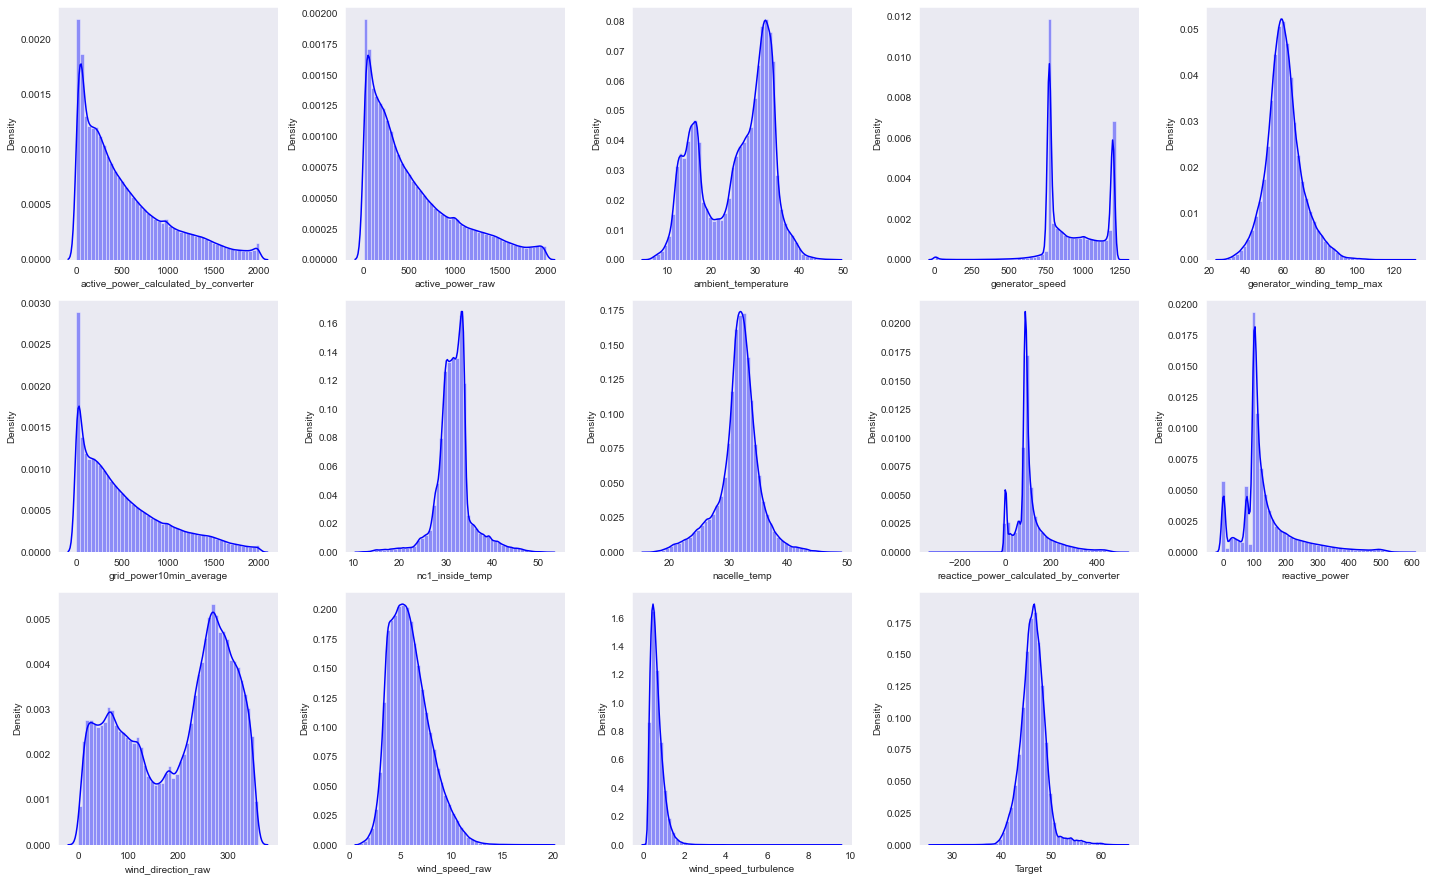

In [53]:
# Plotting the distributions of the numerical features
plt.figure(figsize=(20,16))

for i, col in enumerate(list(train_num)):
    plt.subplot(4,5,i+1)
    sns.distplot(train_num[col], color='b', kde=True, label='data')
    plt.grid()
    plt.tight_layout()

Some are normally distributed; and some left skewed. The target variable ('Target') is normally distributed. Let's apply a power transformer on the data and see how that affects the distributions.

In [54]:
train_num.head()

,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,wind_direction_raw,wind_speed_raw,wind_speed_turbulence,Target
0,816.636759,834.917206,31.694380,1159.616602,65.954214,917.897085,31.881972,31.504713,141.457644,165.501518,280.864782,7.057000,0.544082,47.582787
1,419.107829,421.050873,12.894948,928.747996,59.571319,445.554250,32.423705,32.755770,89.186457,113.835236,299.552460,5.474937,0.469031,46.070328
2,1303.530558,1337.566142,16.648388,1201.219775,61.270498,1364.716003,11.446849,18.332985,230.622309,281.452253,84.960106,8.092457,0.622318,39.989236
3,61.494872,53.481008,28.388141,769.806122,40.674348,14.324897,34.253204,32.662889,66.211015,75.017531,87.261119,4.071032,0.760719,46.056587
4,593.514364,611.659108,31.519527,1046.916768,64.341763,599.020172,32.405586,31.466387,137.163938,160.202421,313.724818,6.357943,0.346068,54.346095


In [55]:
train_num_feat = train_num.drop('Target', axis=1)
train_num_feat.head()

,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,wind_direction_raw,wind_speed_raw,wind_speed_turbulence
0,816.636759,834.917206,31.694380,1159.616602,65.954214,917.897085,31.881972,31.504713,141.457644,165.501518,280.864782,7.057000,0.544082
1,419.107829,421.050873,12.894948,928.747996,59.571319,445.554250,32.423705,32.755770,89.186457,113.835236,299.552460,5.474937,0.469031
2,1303.530558,1337.566142,16.648388,1201.219775,61.270498,1364.716003,11.446849,18.332985,230.622309,281.452253,84.960106,8.092457,0.622318
3,61.494872,53.481008,28.388141,769.806122,40.674348,14.324897,34.253204,32.662889,66.211015,75.017531,87.261119,4.071032,0.760719
4,593.514364,611.659108,31.519527,1046.916768,64.341763,599.020172,32.405586,31.466387,137.163938,160.202421,313.724818,6.357943,0.346068


In [56]:
# Applying normalization & transformation to see if it reduces the impact of outliers
from sklearn.preprocessing import PowerTransformer

# Init
pt = PowerTransformer()

train_num_feat = pd.DataFrame(pt.fit_transform(train_num_feat), columns=train_num_feat.columns)
train_num_feat.head()

,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,wind_direction_raw,wind_speed_raw,wind_speed_turbulence
0,0.804489,0.812812,0.754969,1.217683,0.577310,0.924106,0.023750,-0.099916,0.491302,0.492280,0.777760,0.682465,-0.181267
1,0.105511,0.091834,-1.508825,-0.049678,-0.067461,0.154954,0.162061,0.262363,-0.182065,-0.061024,0.949197,-0.090553,-0.532215
2,1.393659,1.403914,-1.131586,1.455545,0.108487,1.440377,-4.905537,-3.179904,1.480174,1.499626,-1.083126,1.115842,0.137915
3,-1.228872,-1.356495,0.294849,-0.865130,-2.296073,-1.659102,0.631422,0.235060,-0.516278,-0.557574,-1.060222,-0.938929,0.609483
4,0.451064,0.466452,0.730050,0.587518,0.418478,0.445702,0.157430,-0.110827,0.439360,0.439541,1.078729,0.359877,-1.226905


In [57]:
train_num_feat.skew(axis=0)

active_power_calculated_by_converter     -0.110339
active_power_raw                         -0.097555
ambient_temperature                      -0.232208
generator_speed                          -0.023327
generator_winding_temp_max                0.016822
grid_power10min_average                  -0.166983
nc1_inside_temp                           0.202477
nacelle_temp                              0.119152
reactice_power_calculated_by_converter   -1.465851
reactive_power                            0.100957
wind_direction_raw                       -0.406996
wind_speed_raw                           -0.001060
wind_speed_turbulence                     0.046962
dtype: float64

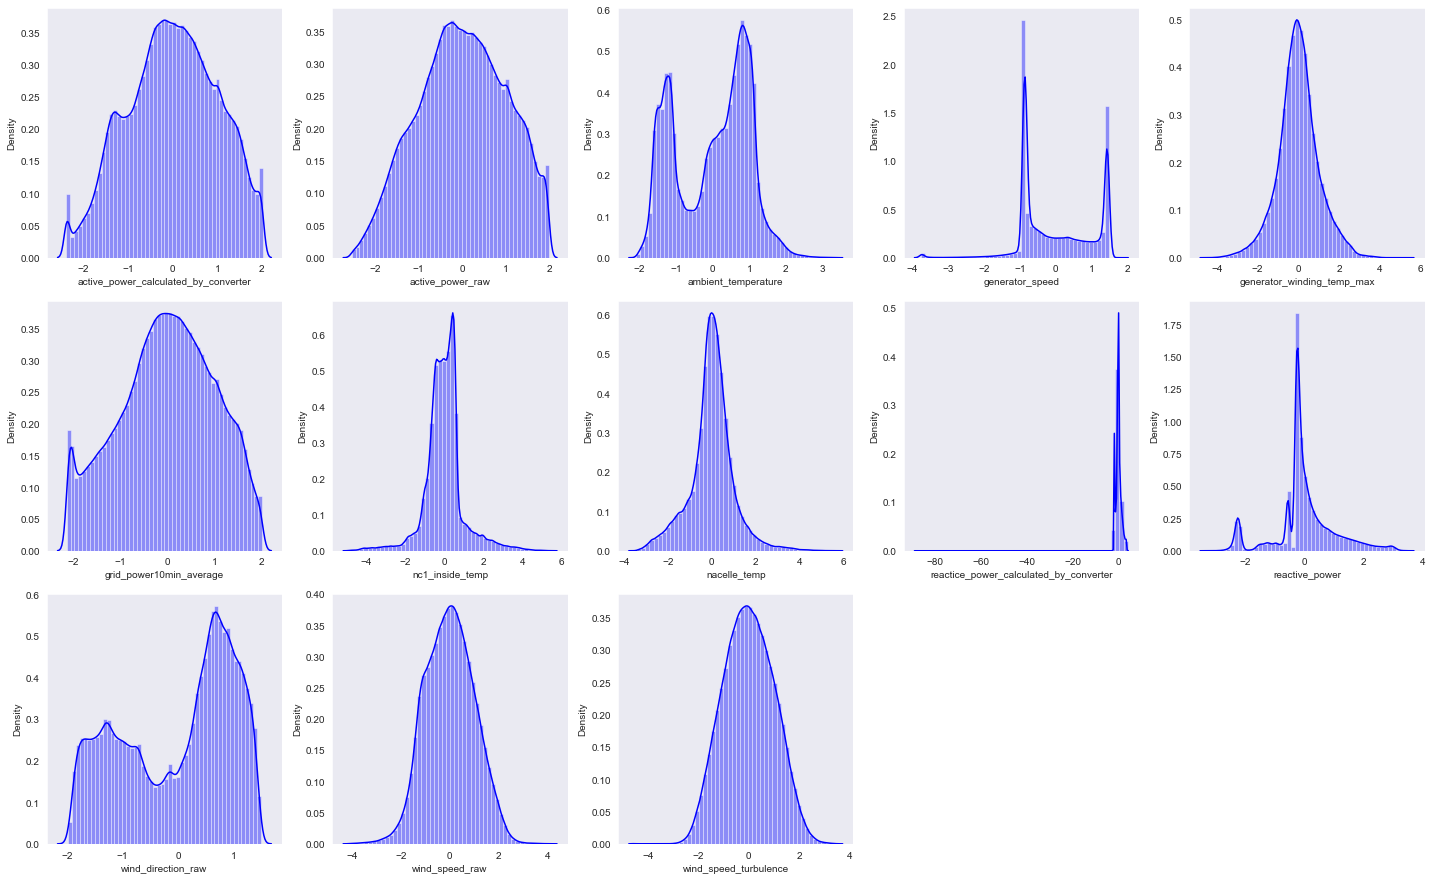

In [58]:
# Plotting the distributions of the numerical features after applying log transformation
plt.figure(figsize=(20,16))

for i, col in enumerate(list(train_num_feat)):
    plt.subplot(4,5,i+1)
    sns.distplot(train_num_feat[col], color='b', kde=True, label='data')
    plt.grid()
    plt.tight_layout()

The Power transformer has improved the distribution. There are some outliners for the " reactice_power_calculated_by_converter" feature; we will see how to treat that in later stages. But for now this transformation can be applied and taken forward.

**FEATURE SELECTION**

In [22]:
train.columns

Index(['active_power_calculated_by_converter', 'active_power_raw',
       'ambient_temperature', 'generator_speed', 'generator_winding_temp_max',
       'grid_power10min_average', 'nc1_inside_temp', 'nacelle_temp',
       'reactice_power_calculated_by_converter', 'reactive_power',
       'wind_direction_raw', 'wind_speed_raw', 'wind_speed_turbulence',
       'turbine_id', 'Target'],
      dtype='object')

In [59]:
feat_cols = ['active_power_calculated_by_converter', 'active_power_raw', 'ambient_temperature',
              'generator_speed', 'generator_winding_temp_max', 'grid_power10min_average', 'nc1_inside_temp',
              'nacelle_temp', 'reactice_power_calculated_by_converter', 'reactive_power', 'wind_direction_raw',
              'wind_speed_raw', 'wind_speed_turbulence']

cat_cols = ['turbine_id']

X = train_num_feat[feat_cols]
y = train['Target']

In [60]:
X.shape[1]

13

In [61]:
X.head()

,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,wind_direction_raw,wind_speed_raw,wind_speed_turbulence
0,0.804489,0.812812,0.754969,1.217683,0.577310,0.924106,0.023750,-0.099916,0.491302,0.492280,0.777760,0.682465,-0.181267
1,0.105511,0.091834,-1.508825,-0.049678,-0.067461,0.154954,0.162061,0.262363,-0.182065,-0.061024,0.949197,-0.090553,-0.532215
2,1.393659,1.403914,-1.131586,1.455545,0.108487,1.440377,-4.905537,-3.179904,1.480174,1.499626,-1.083126,1.115842,0.137915
3,-1.228872,-1.356495,0.294849,-0.865130,-2.296073,-1.659102,0.631422,0.235060,-0.516278,-0.557574,-1.060222,-0.938929,0.609483
4,0.451064,0.466452,0.730050,0.587518,0.418478,0.445702,0.157430,-0.110827,0.439360,0.439541,1.078729,0.359877,-1.226905


**Correlation check for multi-collinearity**

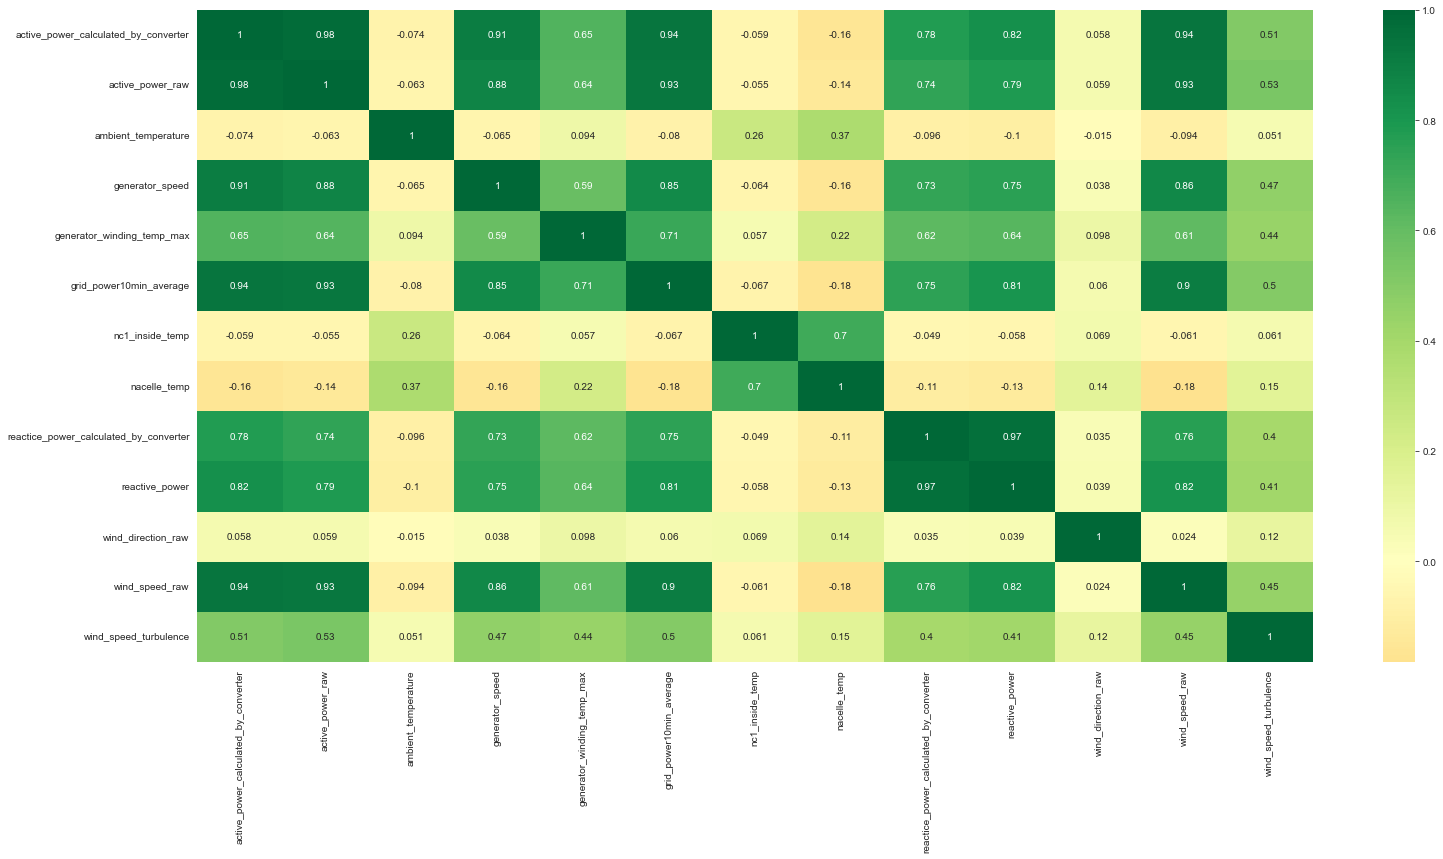

In [62]:
# Plotting a heatmap plot

from turtle import color
plt.figure(figsize=(25,12))
p = sns.heatmap(data=train_num_feat.corr(method='pearson'), cmap='RdYlGn', annot=True, center=0)

**Correlation of Independent Variables**

Based on the coefficient values some of the independent variables are highly correlated to each other (value >=0.8). This means we may need to drop one of these to ensure we do not overfit the model. We will analyze further with some other methods (VIF, Feature Selection and Embedded methods) to come to an optimal set of features.

* active_power_calculated_by_converter & active_power_raw 
* active_power_calculated_by_converter & wind_speed_raw
* active_power_calculated_by_converter & grid_power10min_average
* active_power_raw & wind_speed_raw
* active_power_raw & grid_power10min_average
* generator_speed & active_power_calculated_by_converter  
* reactice_power_calculated_by_converter & reactive_power

**VIF Check**

In [63]:
# Import VIF library for multi-collinearity check
from statsmodels.stats.outliers_influence import variance_inflation_factor 

def calc_vif(dataframe):

    # calculating VIF
    vif = pd.DataFrame()
    vif["Variables"] = dataframe.columns
    vif["VIF"] = [variance_inflation_factor(dataframe.values, i) for i in range(dataframe.shape[1])]
    vif = vif.sort_values(ascending=False, by="VIF")
    return(vif)

calc_vif(train_num_feat) 

,Variables,VIF
0,active_power_calculated_by_converter,38.181699
1,active_power_raw,26.281814
9,reactive_power,21.902869
8,reactice_power_calculated_by_converter,17.417872
5,grid_power10min_average,12.335362
11,wind_speed_raw,10.142883
3,generator_speed,5.853446
7,nacelle_temp,3.367055
4,generator_winding_temp_max,3.303477
6,nc1_inside_temp,2.237131


* VIF starts at 1 and has no upper limit
* VIF = 1, no correlation between the independent variable and the other variables
* VIF exceeding 5 or 10 indicates high multicollinearity between this independent variable and the others

I will remove one column at a time, starting with the highest VIF value, and see how it impacts the other VIF values.

In [64]:
train_num_feat = train_num_feat.drop('active_power_calculated_by_converter', axis=1)
calc_vif(train_num_feat)

,Variables,VIF
8,reactive_power,21.761528
7,reactice_power_calculated_by_converter,17.399387
0,active_power_raw,12.791395
4,grid_power10min_average,11.460072
10,wind_speed_raw,9.928776
2,generator_speed,5.029596
6,nacelle_temp,3.361302
3,generator_winding_temp_max,3.286653
5,nc1_inside_temp,2.236232
11,wind_speed_turbulence,1.577873


We can see that the VIF value of "active_power_raw" has reduced drastically. We will check removing the next variable that has the highest VIF per the table above - "reactive_power".

In [65]:
train_num_feat = train_num_feat.drop('reactive_power', axis=1)
calc_vif(train_num_feat)

,Variables,VIF
0,active_power_raw,12.789917
4,grid_power10min_average,11.010275
9,wind_speed_raw,9.536501
2,generator_speed,4.913811
6,nacelle_temp,3.357488
3,generator_winding_temp_max,3.282933
7,reactice_power_calculated_by_converter,2.793075
5,nc1_inside_temp,2.233780
10,wind_speed_turbulence,1.571800
1,ambient_temperature,1.177466


In [66]:
#train_num_feat = train_num_feat.drop('active_power_raw', axis=1)
#calc_vif(train_num_feat)

We can see that removing "active_power_raw" does not impact the other independent variables much. We can stop here by dropping 'active_power_calculated_by_converter' and 'reactive_power' and look at further techniques for feature selection.

In [67]:
train_num_feat.head()

,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,wind_direction_raw,wind_speed_raw,wind_speed_turbulence
0,0.812812,0.754969,1.217683,0.577310,0.924106,0.023750,-0.099916,0.491302,0.777760,0.682465,-0.181267
1,0.091834,-1.508825,-0.049678,-0.067461,0.154954,0.162061,0.262363,-0.182065,0.949197,-0.090553,-0.532215
2,1.403914,-1.131586,1.455545,0.108487,1.440377,-4.905537,-3.179904,1.480174,-1.083126,1.115842,0.137915
3,-1.356495,0.294849,-0.865130,-2.296073,-1.659102,0.631422,0.235060,-0.516278,-1.060222,-0.938929,0.609483
4,0.466452,0.730050,0.587518,0.418478,0.445702,0.157430,-0.110827,0.439360,1.078729,0.359877,-1.226905


In [68]:
feat_cols_1 = ['active_power_raw', 'ambient_temperature','generator_speed', 'generator_winding_temp_max',
                'grid_power10min_average', 'nc1_inside_temp','nacelle_temp', 'reactice_power_calculated_by_converter',
                'wind_direction_raw', 'wind_speed_raw', 'wind_speed_turbulence']

X = X[feat_cols_1]
X.shape

(909604, 11)

In [69]:
X.head()

,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,wind_direction_raw,wind_speed_raw,wind_speed_turbulence
0,0.812812,0.754969,1.217683,0.577310,0.924106,0.023750,-0.099916,0.491302,0.777760,0.682465,-0.181267
1,0.091834,-1.508825,-0.049678,-0.067461,0.154954,0.162061,0.262363,-0.182065,0.949197,-0.090553,-0.532215
2,1.403914,-1.131586,1.455545,0.108487,1.440377,-4.905537,-3.179904,1.480174,-1.083126,1.115842,0.137915
3,-1.356495,0.294849,-0.865130,-2.296073,-1.659102,0.631422,0.235060,-0.516278,-1.060222,-0.938929,0.609483
4,0.466452,0.730050,0.587518,0.418478,0.445702,0.157430,-0.110827,0.439360,1.078729,0.359877,-1.226905


In [70]:
# Importing all necessary libraries

from math import sqrt
import xgboost as xgb
import lightgbm as lgb
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from functools import partial
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import cross_val_score, KFold

# creating test set of feature columns for prediction
X_test = test[feat_cols_1]

In [72]:
X_test.shape

(303202, 11)

In [73]:
# SPLIT TRAIN DATASET INTO TRAIN & VALIDATION TO TEST MODEL BEFORE PREDICTING ON TEST DATASET

X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.9, random_state=42)

print(X_train.shape, y_train.shape, X_val.shape, y_val.shape)

(818643, 11) (818643,) (90961, 11) (90961,)


In [74]:
etr = ExtraTreesRegressor(n_estimators=200, random_state=385,n_jobs=3)
rfr = RandomForestRegressor(n_jobs=3,random_state=298)
lgbmr = LGBMRegressor(random_state=120, n_jobs=3)
xgbr = XGBRegressor(n_jobs=3,random_state=476)
cbr = CatBoostRegressor(random_state=386,loss_function='MAPE')

In [75]:
#from sklearn.model_selection import RandomizedSearchCV
#rscv = RandomizedSearchCV(etr,params,random_state=385,n_jobs=3,cv=5,verbose=5,scoring='neg_mean_absolute_percentage_error',n_iter=5)

In [76]:
est_preds = []

for x,y in zip([etr,rfr,lgbmr,xgbr,cbr],['etr','rfr','lgbmr','xgbr','cbr']):
    x.fit(X_train, y_train)
    print('{} has test mape of {}'.format(y,mean_absolute_percentage_error(y_val, x.predict(X_val))))
    est_preds.append(x.predict(X_test))

etr has test mape of 0.014617009807444488
rfr has test mape of 0.015786479807942365
lgbmr has test mape of 0.02358340408924809
xgbr has test mape of 0.022134192208014214
0:	learn: 0.0406749	total: 135ms	remaining: 2m 14s
1:	learn: 0.0403793	total: 177ms	remaining: 1m 28s
2:	learn: 0.0400918	total: 215ms	remaining: 1m 11s
3:	learn: 0.0398150	total: 254ms	remaining: 1m 3s
4:	learn: 0.0395316	total: 295ms	remaining: 58.6s
5:	learn: 0.0392698	total: 336ms	remaining: 55.6s
6:	learn: 0.0390154	total: 381ms	remaining: 54s
7:	learn: 0.0387605	total: 426ms	remaining: 52.9s
8:	learn: 0.0385111	total: 467ms	remaining: 51.4s
9:	learn: 0.0382721	total: 508ms	remaining: 50.2s
10:	learn: 0.0380232	total: 547ms	remaining: 49.2s
11:	learn: 0.0377809	total: 591ms	remaining: 48.7s
12:	learn: 0.0375492	total: 630ms	remaining: 47.8s
13:	learn: 0.0373179	total: 669ms	remaining: 47.1s
14:	learn: 0.0371010	total: 708ms	remaining: 46.5s
15:	learn: 0.0368807	total: 749ms	remaining: 46.1s
16:	learn: 0.0366744	to

In [77]:
final = pd.DataFrame(est_preds[0],columns=['etr'])
for x,y in zip(est_preds[1:],['rfr','lgbmr','xgbr','cbr']):
    
    final[y] = list(x)    


In [78]:
final

,etr,rfr,lgbmr,xgbr,cbr
0,50.911816,50.731494,50.265068,52.327389,51.161776
1,50.882361,50.729513,50.099507,52.648537,51.225305
2,50.882361,50.736336,50.099507,52.648537,51.221080
3,50.864807,50.736336,50.099507,52.648537,51.232704
4,50.882361,50.729513,50.099507,52.648537,51.215475
...,...,...,...,...,...
303197,50.846692,50.724562,50.382630,52.597008,51.170311
303198,50.882055,50.724151,50.229464,53.026604,51.155790
303199,50.882409,50.717085,50.099507,52.714165,51.170546
303200,50.842785,50.735278,50.066734,52.745884,51.264407


In [79]:
final['Target'] = final.median(axis=1)

In [80]:
final

,etr,rfr,lgbmr,xgbr,cbr,Target
0,50.911816,50.731494,50.265068,52.327389,51.161776,50.911816
1,50.882361,50.729513,50.099507,52.648537,51.225305,50.882361
2,50.882361,50.736336,50.099507,52.648537,51.221080,50.882361
3,50.864807,50.736336,50.099507,52.648537,51.232704,50.864807
4,50.882361,50.729513,50.099507,52.648537,51.215475,50.882361
...,...,...,...,...,...,...
303197,50.846692,50.724562,50.382630,52.597008,51.170311,50.846692
303198,50.882055,50.724151,50.229464,53.026604,51.155790,50.882055
303199,50.882409,50.717085,50.099507,52.714165,51.170546,50.882409
303200,50.842785,50.735278,50.066734,52.745884,51.264407,50.842785


**PREDICTION**

In [81]:
predictions = pd.DataFrame(list(final['Target']),columns=['Target'])

#test['Target'] = rf_model.predict(X_test)
predictions.to_csv('my_submission.csv', index=False)

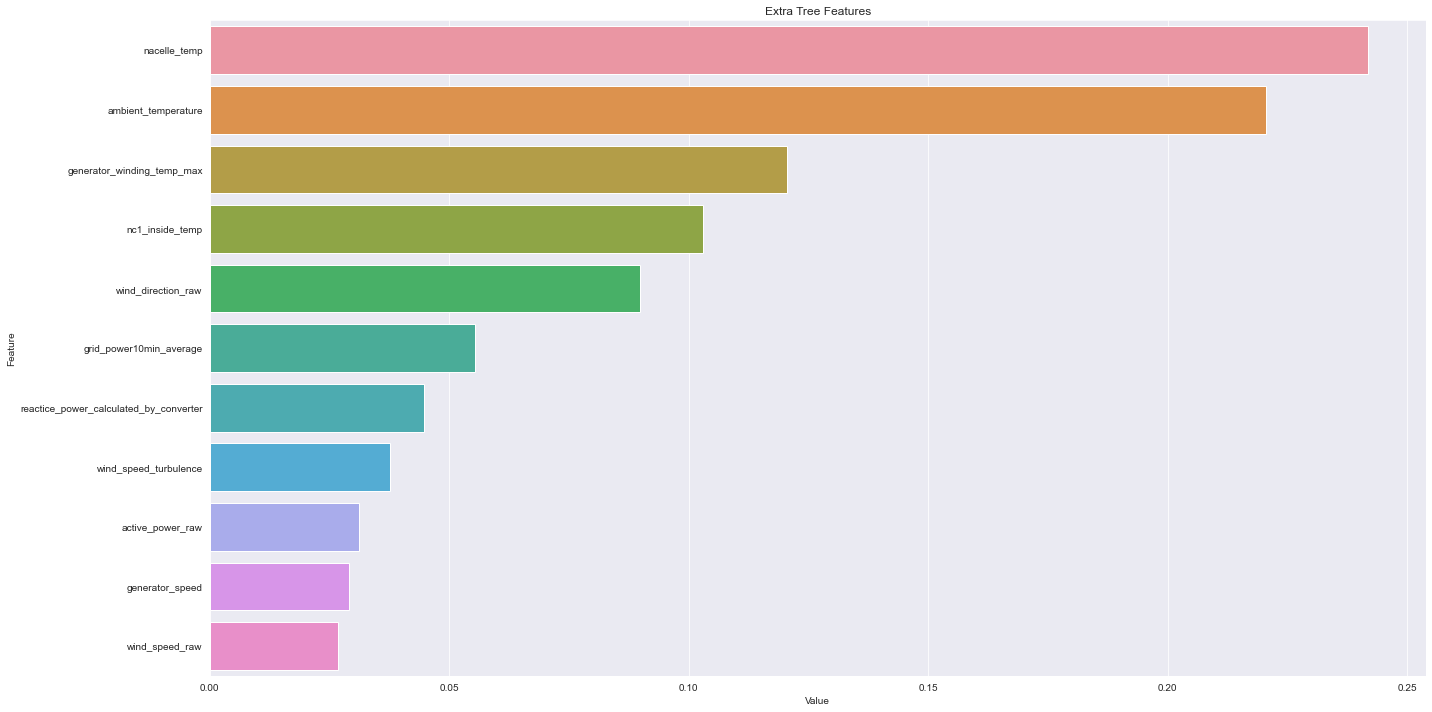

<Figure size 432x288 with 0 Axes>

In [83]:
feature_imp = pd.DataFrame(sorted(zip(etr.feature_importances_,X.columns)), columns=['Value','Feature'])
plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('Extra Tree Features')
plt.tight_layout()
plt.show()
plt.savefig('etr_importances-02.png')